Benjie Gonzales Jr. - 201909128

BS in Computer Science Iv

### Homework 3

In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, scale

##### For Building the Model #####
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

##### random module ######
import random

<b>1. Load Advertising.csv dataset using pandas</b>

In [2]:
data = pd.read_csv("data/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<b>2. add an extra column composing of all ones to X.<b>

In [3]:
data.insert(0, "Bias", [1]*data.shape[0])
data

,Bias,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,1,3,17.2,45.9,69.3,9.3
3,1,4,151.5,41.3,58.5,18.5
4,1,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,1,196,38.2,3.7,13.8,7.6
196,1,197,94.2,4.9,8.1,9.7
197,1,198,177.0,9.3,6.4,12.8
198,1,199,283.6,42.0,66.2,25.5


In [4]:
data = data.drop("Unnamed: 0", axis=1)

In [5]:
data

,Bias,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,1,17.2,45.9,69.3,9.3
3,1,151.5,41.3,58.5,18.5
4,1,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,1,38.2,3.7,13.8,7.6
196,1,94.2,4.9,8.1,9.7
197,1,177.0,9.3,6.4,12.8
198,1,283.6,42.0,66.2,25.5


<b>3. Standardize each column of the dataset</b>

In [6]:
TV_mean = data.TV.mean()
TV_std =  data.TV.std()
Radio_mean =  data.Radio.mean()
Radio_std =  data.Radio.std()
Newspaper_mean =  data.Newspaper.mean()
Newspaper_std =  data.Newspaper.std()
Sales_mean =  data.Sales.mean()
Sales_std =  data.Sales.std()

In [7]:
data['TV'] = data.TV.apply(lambda x: (x - TV_mean) /  TV_std)
data['Radio'] = data.Radio.apply(lambda x: (x - Radio_mean) /  Radio_std)
data['Newspaper'] = data.Newspaper.apply(lambda x: (x - Newspaper_mean) /  Newspaper_std)
data['Sales'] = data.Sales.apply(lambda x: (x - Sales_mean) /  Sales_std)

In [8]:
data.head(5)

,Bias,TV,Radio,Newspaper,Sales
0,1,0.967425,0.979066,1.774493,1.548168
1,1,-1.194379,1.080097,0.667903,-0.694304
2,1,-1.512360,1.524637,1.779084,-0.905135
3,1,0.051919,1.214806,1.283185,0.858177
4,1,0.393196,-0.839507,1.278593,-0.215143


In [9]:
x = data.drop('Sales', axis=1)
y = data.Sales

<b>4. Divide the dataset into training and testing, with 0.85 and 0.25 ratio, respectively.</b>

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, test_size=0.15, random_state = 42)

In [11]:
x_train

,Bias,TV,Radio,Newspaper
9,1,0.614501,-1.391814,-0.429504
18,1,-0.906682,-0.186168,-0.562662
55,1,0.604018,1.760378,1.352060
75,1,-1.515854,1.376457,2.702008
150,1,1.556796,-0.630708,0.295978
...,...,...,...,...
106,1,-1.421508,-0.826036,-0.039213
14,1,0.664586,0.649028,0.709228
92,1,0.822994,0.689441,1.306143
179,1,0.216151,-0.893391,-0.594804


In [12]:
y_train

9     -0.655971
18    -0.521806
55     1.854831
75    -1.020133
150    0.398183
         ...   
106   -1.307629
14     0.954009
92     1.030675
179   -0.272642
102    0.149019
Name: Sales, Length: 170, dtype: float64

<b>5. Fit the model on the training set. Essentially, you have to optimize the model using the
training set, and not including the test set.</b>

Required Functions

a. initialize_weights

In [13]:
 def initialize_weights():
    init_w = np.array([0.0, 0.0, 0.0, 0.0])
    return init_w

In [14]:
initialize_weights()

array([0., 0., 0., 0.])

b. predict

In [15]:
def predict(weights, x):
    y_hat = np.dot(x, weights)
    return y_hat

c. compute_cost

In [16]:
def compute_cost(y_hat, y):
    err = (y_hat - y)
    cost = (1/(2*y.shape[0])) * np.dot(err.T, err)
    
    return cost

d. compute_gradient

In [17]:
def compute_gradient(x, y, y_hat):
    m = y.shape[0]
    partial_derivative = np.dot(x.T, (y_hat - y)) / m
    return partial_derivative

e. update_weights

In [18]:
def update_weights(weights, gradients, alpha):
    return weights - (alpha*gradients)

f. grad_descent

In [19]:
def grad_descent(x, y, iterations, alpha):
    costs_list = []
    thetas_list = []
    
    init_w = initialize_weights()
    
    for i in range(iterations):
        y_hat = predict(init_w, x)
        
        costs = compute_cost(y_hat, y)
        
        gradients = compute_gradient(x, y, y_hat)

        init_w = update_weights(init_w, gradients, alpha)
        
       
        costs_list.append(costs)
        thetas_list.append(init_w)
    
    return thetas_list, costs_list
 

g. plot_costs

In [20]:
def plot_costs(cost):
    costs = pd.DataFrame(cost, columns=['Costs'])
    
    fig, ax = plt.subplots(figsize=(15, 8))
    plt.title("Costs as a function of iteration")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    sns.lineplot(data=costs, ax=ax)
    plt.show()

h. Predict y for train set and calculate the cost.

In [21]:
weights, costs = grad_descent(x_train, y_train, 400, 0.01)

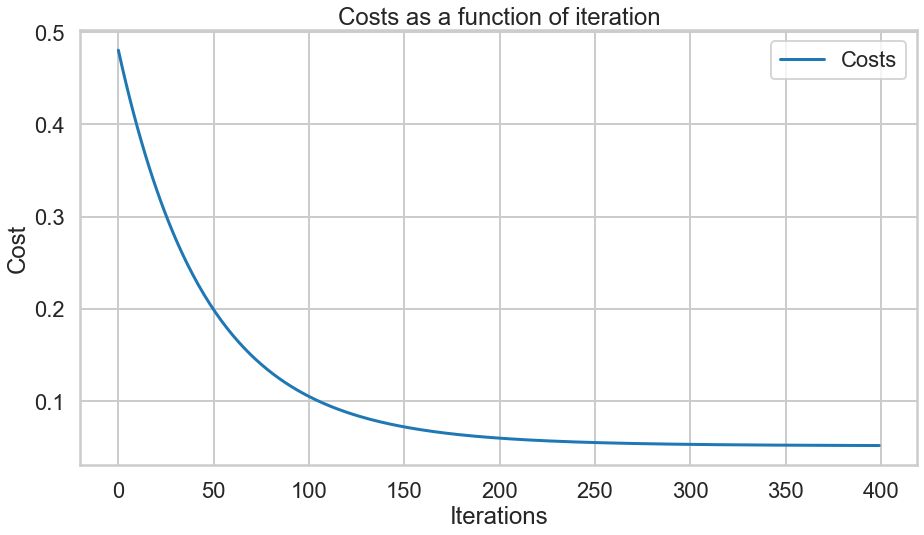

In [22]:
plot_costs(costs)

In [23]:
y_hat = predict(weights[-1], x_train)

In [24]:
y_hat

array([-0.28051541, -0.76580955,  1.38243344, -0.31481056,  0.81360487,
        1.12284959, -0.03564756,  1.3026761 , -0.57775274, -1.77000611,
       -0.80862176, -0.2590117 , -0.75033121, -1.09792228, -0.09014209,
       -1.61544675, -0.88211632,  0.01221296, -0.96016956, -0.46606031,
        0.24199392, -0.39993359, -0.22158989, -0.60610351, -1.39233863,
       -0.75470054, -0.8583917 ,  1.89173261, -1.19990921, -0.28684271,
        0.69166313,  0.2326117 , -0.47929769, -0.58384208,  0.52293933,
       -1.33716789,  1.35727662, -1.47691782, -0.76834279, -0.50358686,
       -0.89858126, -1.39494104,  0.16607568,  0.61651468,  0.35507311,
        0.41320764,  0.15422915,  1.00135168,  0.00460569,  1.30284361,
       -0.26091803, -0.06057727, -0.93870822,  0.54717369, -1.06416017,
        0.26668195, -0.05771333,  1.69405019, -0.31780621,  1.67024266,
       -1.35913071,  0.87252629,  1.80186332,  0.8521557 ,  0.56581952,
        0.42185002, -0.2909157 , -0.4316966 ,  0.55053983,  0.09

In [25]:
compute_cost(y_hat, y_train)

0.051467069634928565

<b>6. Predicting the quantitative response y on the train set. Evaluating performance using the MSE cost function defined for the gradient descent.</b>

In [26]:
mean_squared_error(y_train, y_hat)

0.10293413926985712

i. Predict y for test set and calculate the cost

In [27]:
y_hat_2 = predict(weights[-1], x_test)

In [28]:
compute_cost(y_hat_2, y_test)

0.05508804927847815

<b>7. Predicting the quantitative response y on the train set. Evaluating performance using the MSE cost function defined for the gradient descent.</b>

In [29]:
mean_squared_error(y_test, y_hat_2)

0.1101760985569563

<b>8. Revert back a standardized data into the original form</b> 

In [30]:
new_data = pd.DataFrame()

In [31]:
new_data['TV'] = data.TV.apply(lambda x: (x * TV_std + TV_mean))
new_data['Radio'] = data.Radio.apply(lambda x: (x * Radio_std + Radio_mean))
new_data['Newspaper'] = data.Newspaper.apply(lambda x: (x * Newspaper_std + Newspaper_mean))
new_data['Sales'] = data.Sales.apply(lambda x: (x * Sales_std + Sales_mean))

new_data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [32]:
x2 = new_data.drop('Sales', axis=1)
y2 = new_data.Sales
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, train_size=0.85, test_size=0.15, random_state = 42)

In [33]:
y_hat2 = predict(weights[-1], x_train2)
y_hat_test2 = predict(weights[-1], x_test)

In [34]:
compute_cost(y_hat2, y_train2)

0.051467069634928565

In [35]:
compute_cost(y_hat_test2, y_test2)

0.05508804927847815

In [36]:
mean_squared_error(y_train2, y_hat2)

0.10293413926985712

In [37]:
mean_squared_error(y_test2, y_hat_test2)

0.1101760985569563

We may conclude that even if the data weren't normalized, we could still obtain findings that are similar since the costs and MSE of the standardized and the original datasets are comparable.

<b> Compare Code with Scikit-learn Linear Regression using standardized training and test data </b>

In [38]:
model = LinearRegression().fit(x_train, y_train)

In [39]:
r_2 = model.score(x_train, y_train)
r_2

0.8936793584593189

In [40]:
r_2_test = model.score(x_test, y_test)

In [41]:
pred = model.predict(x_test)

In [42]:
y_hat_2

array([ 0.45608244,  1.28515934,  1.42347461, -0.64921566,  1.47879146,
       -0.1706977 ,  1.30218704, -1.2362777 , -0.07207615,  0.2136751 ,
       -0.96180887, -1.37448756,  0.1189018 , -0.98942856, -0.80008631,
       -0.33271478, -0.99613887,  0.40986922, -0.70366205,  0.88741908,
        1.06547073, -0.10087422, -0.35064106,  1.38933658, -1.17734202,
       -1.53583278,  1.2513131 , -0.39221506, -0.90608362, -1.06675884])

In [43]:
model.coef_

array([0.        , 0.73738315, 0.53630718, 0.00314254])

### QUESTIONS

<i> 1. What are the optimal weights found by your implemented gradient descent? What are your interpretations regarding the formed linear model? </i>

In [44]:
weights[-1]

array([0.00218526, 0.72460531, 0.51470896, 0.02698926])

<b>If weights were initially set at 0, the optimal weights would be:
h0(x) = 0.00218526 + 0.72460531 * TV + 0.51470896 * Radio + 0.02698926 * Newspaper
According to this linear model, TV has a greater influence on sales than newspapers since it carries a greater weight.
</b>

<i> 2. Provide a scatter plot of the y_hat and y for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn). </i>

<AxesSubplot:title={'center':'Y_hat values VS Y values in Train Set'}, xlabel='Predicted sales', ylabel='Sales'>

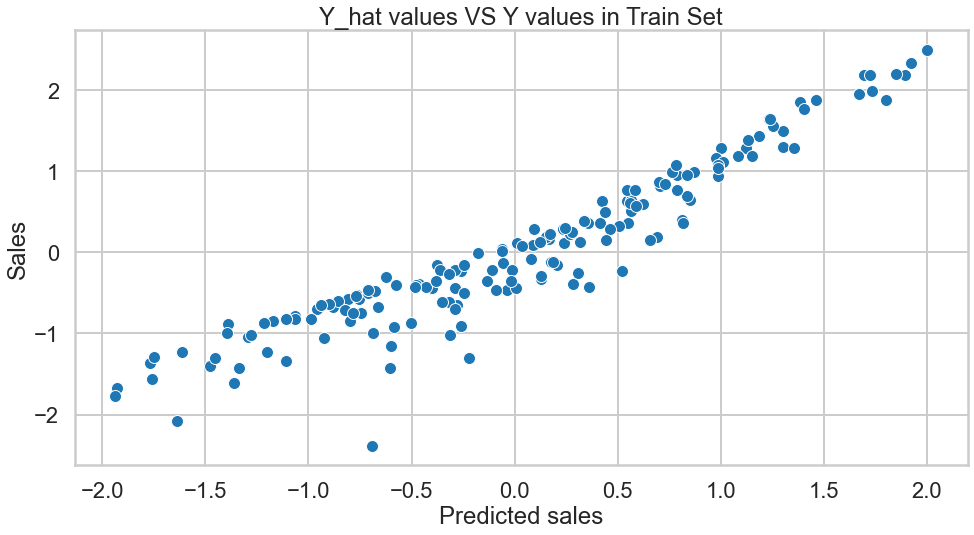

In [45]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Y_hat values VS Y values in Train Set")
plt.xlabel("Predicted sales")
sns.scatterplot(x=y_hat, y=y_train, ax=ax)

In [46]:
print(f"The r2 score is {r2_score(y_train, y_hat)}")

The r2 score is 0.8928727571970488


<AxesSubplot:title={'center':'Y_hat values VS Y values in Test Set'}, xlabel='Predicted sales', ylabel='Sales'>

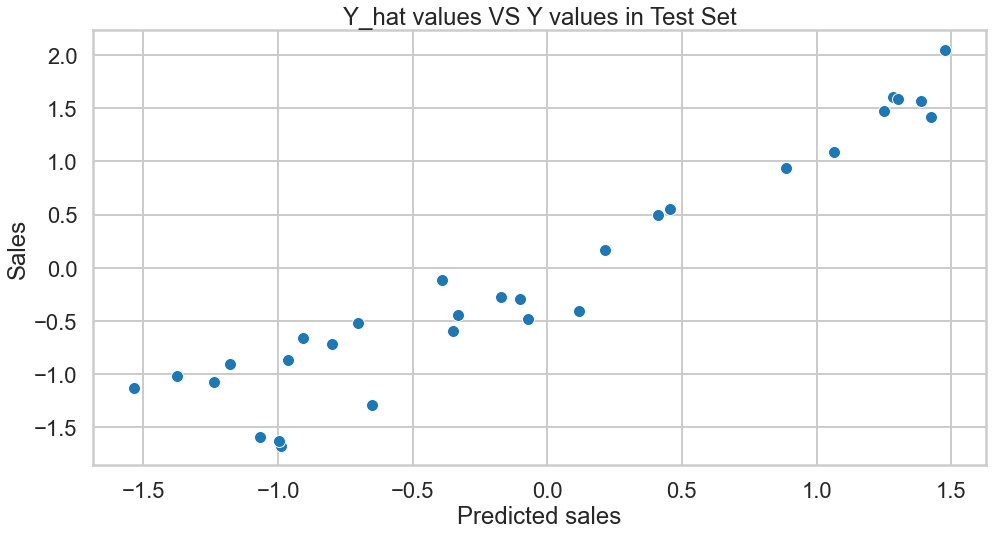

In [47]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Y_hat values VS Y values in Test Set")
plt.xlabel("Predicted sales")
sns.scatterplot(x=y_hat_2, y=y_test, ax=ax)

In [48]:
print(f"The r2 score is {r2_score(y_test, y_hat_2)}")

The r2 score is 0.9065041410827248


<i>3. What happens to the error, r2, and cost as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).</i>

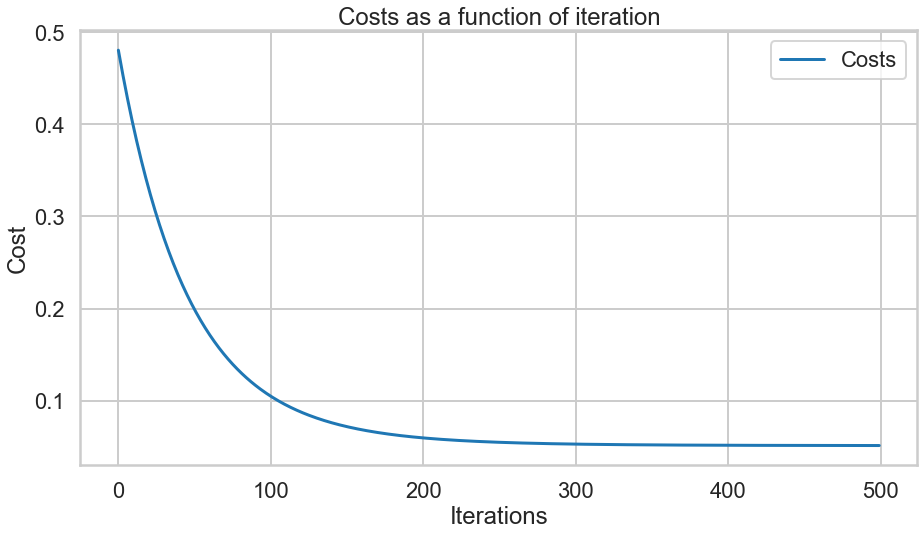

In [49]:
weights2, costs2 =  grad_descent(x_train, y_train, 500, 0.01)
plot_costs(costs2)

In [50]:
y_hat_500 = predict(weights2[-1], x_train)
print("Error: \n", y_train - y_hat_500)
print("R2:\n", r2_score(y_train, y_hat_500))

Error: 
 9     -0.370362
18     0.248339
55     0.464954
75    -0.677604
150   -0.418063
         ...   
106    0.166727
14     0.113416
92     0.042863
179    0.046183
102   -0.516776
Name: Sales, Length: 170, dtype: float64
R2:
 0.8934618344944969


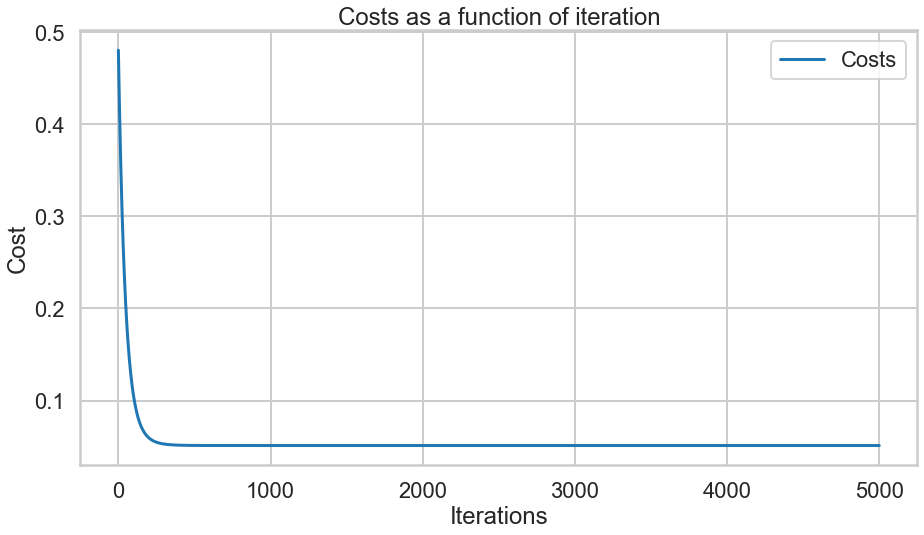

In [51]:
weights2, costs2 =  grad_descent(x_train, y_train, 5000, 0.01)
plot_costs(costs2)

In [52]:
y_hat_5000 = predict(weights2[-1], x_train)
r2_score(y_train, y_hat_5000)
print("Error: \n", y_train - y_hat_5000)
print("R2:\n", r2_score(y_train, y_hat_5000))

Error: 
 9     -0.361739
18     0.247942
55     0.460650
75    -0.649499
150   -0.412885
         ...   
106    0.183263
14     0.113212
92     0.049520
179    0.048537
102   -0.518237
Name: Sales, Length: 170, dtype: float64
R2:
 0.8936793584593189


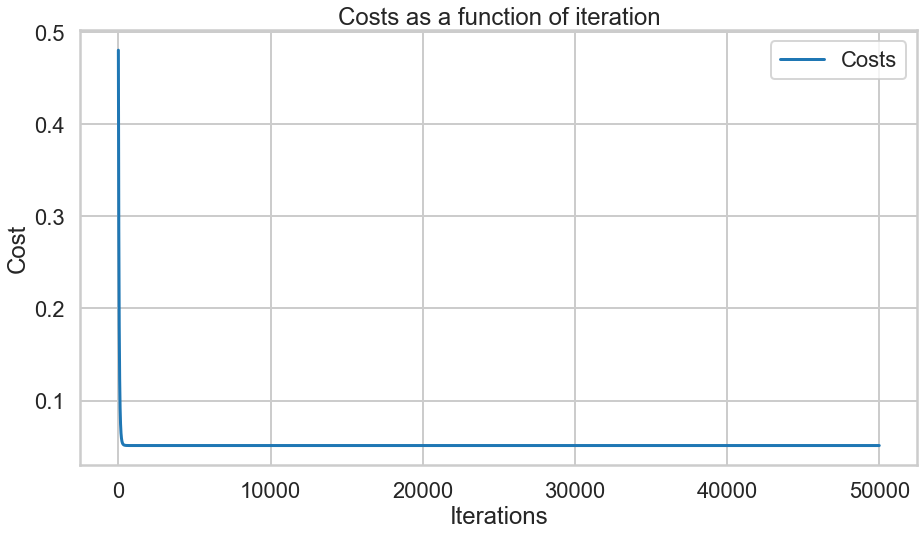

In [53]:
weights2, costs2 = grad_descent(x_train, y_train, 50000, 0.01)
plot_costs(costs2)

In [54]:
y_hat_50000 = predict(weights2[-1], x_train)
r2_score(y_train, y_hat_50000)
print("Error: \n", y_train - y_hat_50000)
print("R2:\n", r2_score(y_train, y_hat_50000))

Error: 
 9     -0.361739
18     0.247942
55     0.460650
75    -0.649499
150   -0.412885
         ...   
106    0.183263
14     0.113212
92     0.049520
179    0.048537
102   -0.518237
Name: Sales, Length: 170, dtype: float64
R2:
 0.8936793584593189


<b>As seen in the figures, costs decrease as the number of iterations increase. Each model's errors between y train and predicted y decrease as well. The R2 score increases as the model is iterated more times, but the differences between models with 1000 and 5000 iterations are so minor that we may conclude that 1000 iterations are more than sufficient.</b>

<i>4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualizethe cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.</i>

In [55]:
weight_1, cost_1 = grad_descent(x_train, y_train, 500, 0.1)
weight_01, cost_01 = grad_descent(x_train, y_train, 500, 0.01)
weight_001, cost_001 = grad_descent(x_train, y_train, 500, 0.001)
weight_0001, cost_0001 = grad_descent(x_train, y_train, 500, 0.0001)
weight_2, cost_2 = grad_descent(x_train, y_train, 500, 0.2)

In [56]:
cost_1 = pd.DataFrame(cost_1, columns=['Cost'])
cost_01 = pd.DataFrame(cost_01, columns=['Cost'])
cost_001 = pd.DataFrame(cost_001, columns=['Cost'])
cost_0001 = pd.DataFrame(cost_0001, columns=['Cost'])
cost_2 = pd.DataFrame(cost_2, columns=['Cost'])

df_costs = pd.concat([cost_1, cost_01, cost_001, cost_0001, cost_2], axis=1, keys=['0.1', '0.01', '0.001', '0.0001', '0.2'])

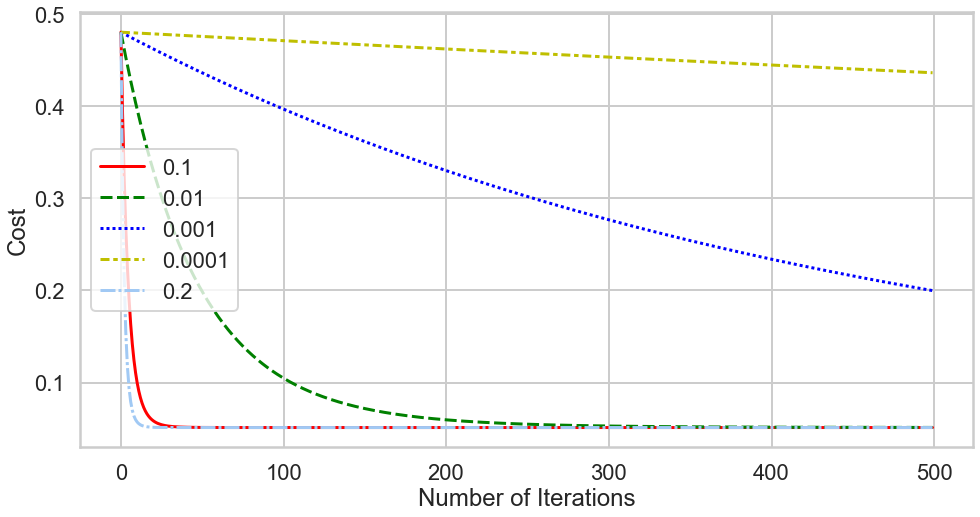

In [57]:
# define dimensions
fig, ax = plt.subplots(figsize=(16, 8))
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
# call lineplot of seaborn
sns.lineplot(data=df_costs, ax=ax, palette=['r', 'g', 'b', 'y', '#a1c9f4'], )
plt.show()

<b>The cost of the model produced via gradient descent stays high when the learning rate is too low, such as 0.0001 or 0.001. When the learning rate is too high, such as 0.2 or 0.1, however, the cost function returns too steeply and is not the proper learning rate for the number of repetitions given since it takes an excessively large step with each iteration. If the learning rate is just appropriate, say 0.01 for our dataset, you can observe how the costs vary gradually with each iteration and how they decrease until they hit a significant minimum.</b>


<i>5. Is there a relationship on the learning rate and the number of iterations?<i>

When the learning rate is too low, it will take a lot more iterations to create a model that provides the lowest possible cost, which consumes an excessive amount of time and resources. Gradient descent will not be able to provide you with a model that generates the minimal cost if the number of iterations is too little and the learning rate is high since it may take too huge of steps and skip over the minimum cost or may not even get there. To ensure that the projected weights for each iteration only change gradually and finally achieve the lowest cost, you must substantially increase the number of iterations when you significantly lower the learning rate.

<i>6. Compare the results with the results of ordinary least squares function.</i>

In [58]:
print("OLS predictions: ", pred)

OLS predictions:  [ 0.44441111  1.30168679  1.43691235 -0.66730857  1.55533551 -0.19033088
  1.34451196 -1.25613029 -0.07239572  0.21395403 -0.9477649  -1.4143734
  0.04187445 -0.9794427  -0.82941714 -0.35860114 -1.02352749  0.43360346
 -0.72253191  0.92669059  1.04134773 -0.18638735 -0.32341141  1.3765889
 -1.1785509  -1.57241482  1.28461088 -0.38557956 -0.92832092 -1.05226106]


In [59]:
print("Scratch Gradient Descent Predictions: ", y_hat_2)

Scratch Gradient Descent Predictions:  [ 0.45608244  1.28515934  1.42347461 -0.64921566  1.47879146 -0.1706977
  1.30218704 -1.2362777  -0.07207615  0.2136751  -0.96180887 -1.37448756
  0.1189018  -0.98942856 -0.80008631 -0.33271478 -0.99613887  0.40986922
 -0.70366205  0.88741908  1.06547073 -0.10087422 -0.35064106  1.38933658
 -1.17734202 -1.53583278  1.2513131  -0.39221506 -0.90608362 -1.06675884]


In [60]:
print("Ordinary least squares function R2 score:\n", r_2)

Ordinary least squares function R2 score:
 0.8936793584593189


In [61]:
print("Gradient descent R2 score:\n", r2_score(y_test, y_hat_2))

Gradient descent R2 score:
 0.9065041410827248


You may argue that the scratch code performed better since it has a higher R2 score based on the R2 scores of the gradient descent from scratch and the OLS function of scikit-learn.